In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv('train.csv')
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [8]:
df = df.drop(['row_id'], axis =1)

In [9]:
df.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [73]:
df1.iloc[0]

user_id          19990
category_id         37
video_id           128
age                 24
gender            Male
profession     Student
followers          180
views             1000
Name: 0, dtype: object

In [11]:
target = df['engagement_score']
df1 = df.drop(['engagement_score'], axis =1)

In [16]:
num  = df1.select_dtypes(include = 'number')
char = df1.select_dtypes(include = 'object')

<AxesSubplot:>

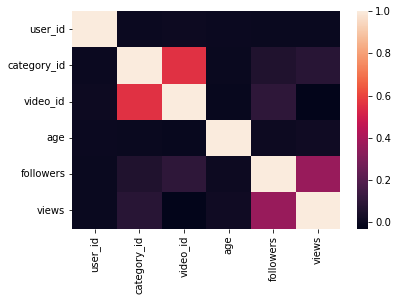

In [81]:
sns.heatmap(num.corr(),annot = False  )

In [17]:
num

,user_id,category_id,video_id,age,followers,views
0,19990,37,128,24,180,1000
1,5304,32,132,14,330,714
2,1840,12,24,19,180,138
3,12597,23,112,19,220,613
4,13626,23,112,27,220,613
...,...,...,...,...,...,...
89192,23996,15,32,25,340,662
89193,20466,20,47,31,240,892
89194,13655,16,97,25,270,462
89195,24840,9,18,35,230,819


In [18]:
char

,gender,profession
0,Male,Student
1,Female,Student
2,Male,Student
3,Male,Student
4,Male,Working Professional
...,...,...
89192,Male,Other
89193,Male,Other
89194,Male,Student
89195,Male,Working Professional


In [20]:
char_1 = pd.get_dummies(char)
char_1

,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,0,1,0,1,0
1,1,0,0,1,0
2,0,1,0,1,0
3,0,1,0,1,0
4,0,1,0,0,1
...,...,...,...,...,...
89192,0,1,1,0,0
89193,0,1,1,0,0
89194,0,1,0,1,0
89195,0,1,0,0,1


In [21]:
clean = pd.concat([num, char_1], axis =1)
clean


,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,0,1,0,1,0
1,5304,32,132,14,330,714,1,0,0,1,0
2,1840,12,24,19,180,138,0,1,0,1,0
3,12597,23,112,19,220,613,0,1,0,1,0
4,13626,23,112,27,220,613,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,340,662,0,1,1,0,0
89193,20466,20,47,31,240,892,0,1,1,0,0
89194,13655,16,97,25,270,462,0,1,0,1,0
89195,24840,9,18,35,230,819,0,1,0,0,1


In [74]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(clean, target, random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytest,y_pred))

0.2746189030478151


In [76]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(xtrain,ytrain)
y_pred_dtree = dtree.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytest,y_pred_dtree))

-0.08780215577739003


In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
y_pred_rfr = rfr.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytest,y_pred_rfr))

0.36328409452404675


In [46]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(xtrain,ytrain)
y_pred_svr = rfr.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytest,y_pred_svr))

0.36328409452404675


In [47]:
print(r2_score(ytest,y_pred_svr))

0.36328409452404675


In [48]:
pip install xgboost

In [78]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
y_pred_xgb = xgb.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytest,y_pred_xgb))

0.37584912873788934


In [88]:
a = pd.DataFrame(data = rfr.feature_importances_, index=clean.columns, 
                 columns = ['importance']).sort_values(['importance'], ascending=False)
a

,importance
user_id,0.363449
age,0.154538
gender_Female,0.132979
video_id,0.099512
profession_Student,0.083562
views,0.054821
category_id,0.043516
gender_Male,0.033282
followers,0.023139
profession_Other,0.007254


In [92]:
from sklearn.model_selection import GridSearchCV

param = {
            'n_estimators' : [10,100,1000],
    'learning_rate' : [0.001,0.01,0.1],
    'subsample' : [0.5,0.7,1.0],
    'max_depth' : [3,5,7,9]
    
}

gs = GridSearchCV(xgb, param_grid = param, cv=5)

gs.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

In [93]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1.0}

In [95]:
gs.cv_results_

{'mean_fit_time': array([ 0.18045316,  0.14641099,  0.12600956,  1.14188657,  1.16248827,
         0.9318706 , 11.59007196, 13.30501399, 10.80562506,  0.22161698,
         0.34202561,  0.32482471,  2.11296053,  2.10656004,  1.89294367,
        20.74672532, 22.67314649, 20.58159528,  0.27562094,  0.31662421,
         0.44103303,  3.22044864,  3.46555786,  3.34836049, 28.92873774,
        30.60804834, 29.1512938 ,  0.40288081,  0.61344719,  0.46495748,
         3.33564653,  4.15331225,  3.55423174, 36.0901207 , 38.18768992,
        37.13098707,  0.14846721,  0.20146532,  0.20990009,  1.27626638,
         1.31416903,  1.04401441, 13.59340906, 13.79289217, 11.21328015,
         0.2209672 ,  0.3026988 ,  0.19235277,  2.02492151,  2.13954692,
         1.85318413, 19.76426401, 20.94377146, 18.65387726,  0.29572663,
         0.29891982,  0.32137308,  3.22860589,  2.81984606,  3.03910928,
        27.64681969, 30.27354794, 27.79778748,  0.30936756,  0.38749199,
         0.48542099,  3.80656614, 

In [ ]:
gs.best_estimator_

In [96]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate = 0.1, max_depth = 9, n_estimators = 100, subsample = 1.0)
xgb.fit(xtrain,ytrain)
y_pred_xgb = xgb.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytest,y_pred_xgb))

0.3811316061587834
